## contour analysis

In [174]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [130]:
im = cv2.imread('Jiebao.png')
img = im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im = cv2.drawContours(im, contours, -1, (255,0,0), 3)

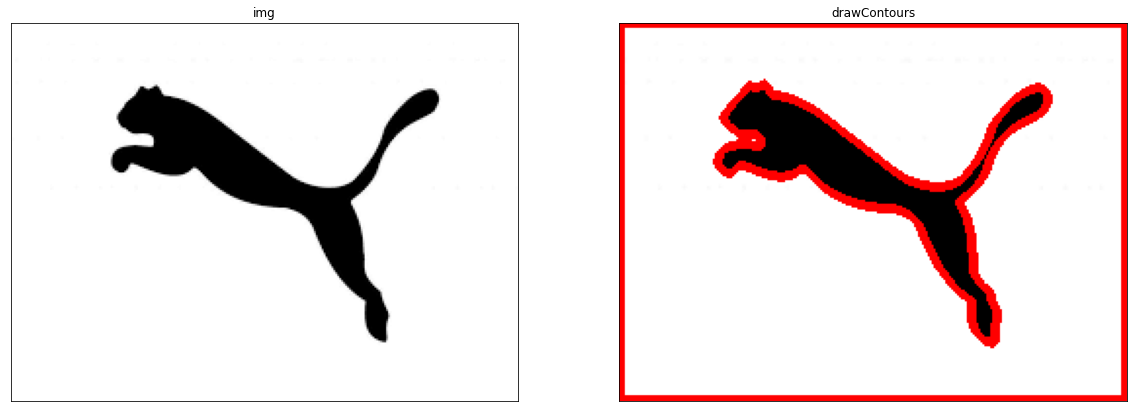

In [131]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im,cmap = 'gray')
plt.title('drawContours'), plt.xticks([]), plt.yticks([])
plt.show()

In [132]:
len(contours)

2

In [133]:
contours[0].shape

(4, 1, 2)

In [134]:
contours[1].shape

(295, 1, 2)

## 1.Moments(904,534)

In [135]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 5153.5, 'm10': 669546.6666666666, 'm01': 407182.6666666666, 'm20': 97667100.75, 'm11': 56542666.95833333, 'm02': 36559071.75, 'm30': 15488246005.900002, 'm21': 8595572471.083334, 'm12': 5433172328.383333, 'm03': 3684983583.5, 'mu20': 10679085.062710896, 'mu11': 3641183.075319633, 'mu02': 4387203.304520667, 'mu30': 24391661.525161743, 'mu21': -67323523.98674929, 'mu12': 108003434.33067715, 'mu03': 103144715.25316334, 'nu20': 0.4020957521038586, 'nu11': 0.1371001577963669, 'nu02': 0.16518978938781473, 'nu30': 0.012793391312381356, 'nu21': -0.035311091292509436, 'nu12': 0.05664764563283571, 'nu03': 0.054099254479922865}


In [136]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [137]:
(w,h,c) = img.shape

In [138]:
img = np.zeros(im.shape,np.uint8)
img = cv2.circle(img,(cx,cy),3,(255,255,0),2)
img = cv2.drawContours(img,contours[1],-1,(255,0,0),3)

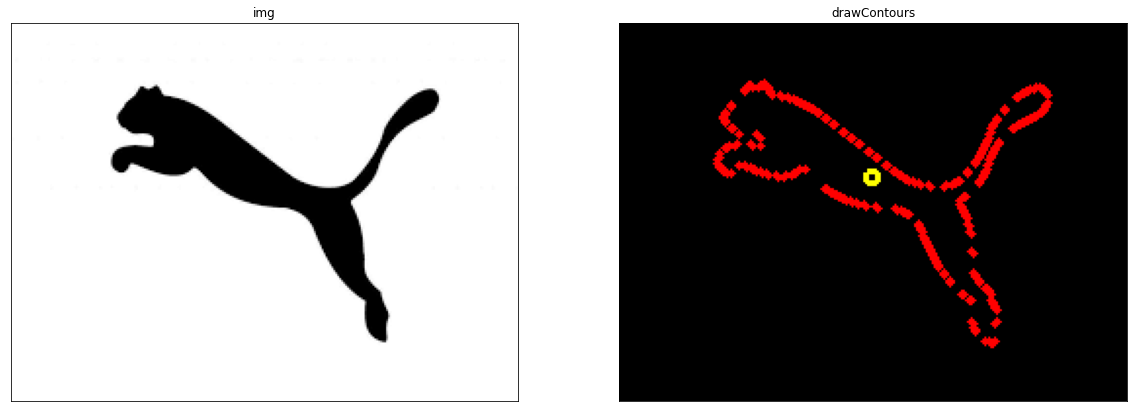

In [139]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('drawContours'), plt.xticks([]), plt.yticks([])
plt.show()

## 2.Contour Area

In [140]:
area = cv2.contourArea(cnt)

## 3. Contour Perimeter

In [141]:
perimeter = cv2.arcLength(cnt,True)

In [142]:
print(perimeter)

650.2813057899475


## 4. Contour Approximation

In [143]:
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [144]:
imgA = np.zeros(im.shape,np.uint8)
imgA = cv2.drawContours(imgA,approx,-1,(255,255,0),3)

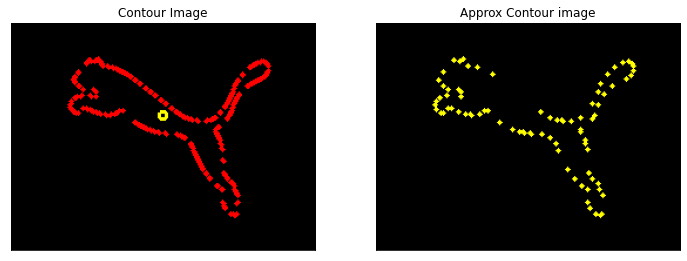

In [145]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgA,cmap = 'gray')
plt.title('Approx Contour image'), plt.xticks([]), plt.yticks([])
plt.show()

In [146]:
len(approx)

83

## 5. Convex Hull

In [147]:
hull = cv2.convexHull(cnt)

In [148]:
imgH = np.zeros(im.shape,np.uint8)
img = cv2.drawContours(img,[hull],-1,(255,255,0),3)

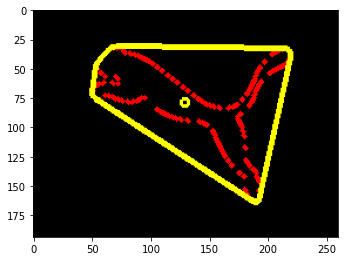

In [149]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()

## 6.Checking Convexity

In [150]:
k = cv2.isContourConvex(cnt)

In [151]:
print(k)

False


## 7. Bounding Rectangle

In [238]:
im = cv2.imread('NIKE.jpg')
img = im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im = cv2.drawContours(im, contours, -1, (255,0,0), 3)

In [239]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 16150.0, 'm10': 2399812.333333333, 'm01': 3780120.833333333, 'm20': 506679579.3333333, 'm11': 531294051.75, 'm02': 901225345.1666666, 'm30': 130487479224.70001, 'm21': 105811055113.41667, 'm12': 120210551109.15, 'm03': 218474409557.75, 'mu20': 150079007.49316138, 'mu11': -30413725.17406249, 'mu02': 16438130.640307903, 'mu30': 10595292856.569534, 'mu21': -3745326813.0137405, 'mu12': 530267137.3815384, 'mu03': -164410441.10488892, 'nu20': 0.5754066750114019, 'nu11': -0.11660698434399827, 'nu02': 0.06302420473811846, 'nu30': 0.31965510786993656, 'nu21': -0.11299478576278803, 'nu12': 0.015997915422836025, 'nu03': -0.004960187320706383}


In [240]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


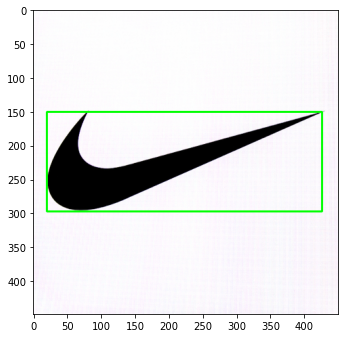

In [241]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()

In [244]:
im = cv2.imread('NIKE.jpg')
img = im.copy()
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(img,[box],0,(0,0,255),2)


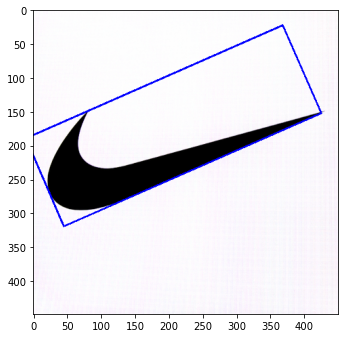

In [245]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()

## 8. Minimum Enclosing Circle

In [228]:
im = cv2.imread('NIKE.jpg')
img = im.copy()
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

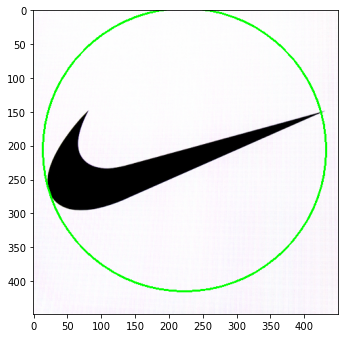

In [229]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()

## 9. Fitting an Ellipse

In [234]:
im = cv2.imread('NIKE.jpg')
img = im.copy()
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)


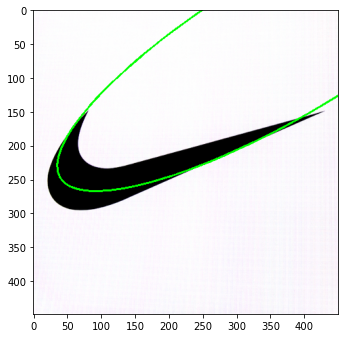

In [235]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()

## 10. Fitting a Line

In [232]:
im = cv2.imread('NIKE.jpg')
img = im.copy()
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

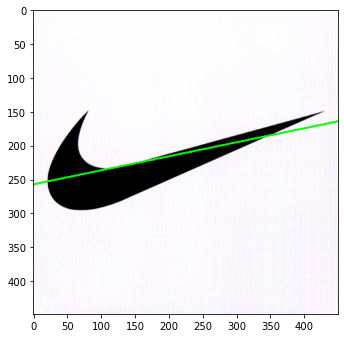

In [233]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()